# Project Notebook

## Contexte
Ce projet utilise un jeu de données sur les **héros**.  
L’objectif est de montrer comment on peut explorer, nettoyer et analyser des données en utilisant Python (Pandas, Matplotlib), et ensuite communiquer les résultats clairement.  

## Objectifs
- Charger et comprendre le jeu de données (dimensions, types, valeurs manquantes).  
- Réaliser des transformations simples (sélections, agrégations).  
- Créer des visualisations pour dégager des tendances (par exemple : répartition par alignement, popularité, force).  
- Exporter les résultats (figures, tableaux) et les intégrer dans une présentation.  

## Importance
Ce travail illustre mes compétences en :
- **Manipulation de données** avec Pandas,  
- **Communication visuelle** avec des graphiques,  
- **Storytelling** pour mettre en valeur les résultats.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

RAW = Path('.') / 'data' / 'raw'
PROC = Path('.') / 'data' / 'processed'
FIGS = Path('.') / 'reports' / 'figures'
TABLES = Path('.') / 'tables'
for p in [PROC, FIGS, TABLES]:
    p.mkdir(parents=True, exist_ok=True)
print('Paths ready')


Paths ready


## 1. Load & Inspect Data

In [20]:
import pandas as pd
df = pd.read_csv("C:/Users/jeudy/OneDrive/Documents/Data Science/Projet 2/heroes_information.csv")
df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## 2. Data exploration

In [21]:
# Dimensions du dataset
print("Nombre de lignes et colonnes :", df.shape)

# Colonnes disponibles
print("Colonnes :", df.columns.tolist())

# Types de variables
print("\nTypes des colonnes :")
print(df.dtypes)

# Statistiques numériques (Height, Weight)
df.describe()

Nombre de lignes et colonnes : (734, 11)
Colonnes : ['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight']

Types des colonnes :
Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object


,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


## 3. Cleaning

In [22]:
# -99 signifie "manquant" dans ce dataset : on remplace par NaN
df = df.replace(-99, np.nan)

# Harmoniser quelques colonnes texte
for col in ["Gender","Alignment","Publisher","Race","Eye color","Hair color"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title().replace({"Nan":"NaN"})

# Si Height/Weight existent, s’assurer que c’est bien numérique
for col in ["Height","Weight"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      517 non-null    float64
 7   Publisher   734 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      495 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


## 4. Targeted descriptive statistics

In [23]:
top_publishers = df["Publisher"].value_counts().head(5)
display(top_publishers)

gender_counts = df["Gender"].value_counts(dropna=False)
alignment_counts = df["Alignment"].value_counts(dropna=False)
display(gender_counts)
display(alignment_counts)

Publisher
Marvel Comics        379
Dc Comics            215
Nbc - Heroes          19
Dark Horse Comics     18
NaN                   15
Name: count, dtype: int64

Gender
Male      505
Female    200
-          29
Name: count, dtype: int64

Alignment
Good       496
Bad        207
Neutral     24
-            7
Name: count, dtype: int64

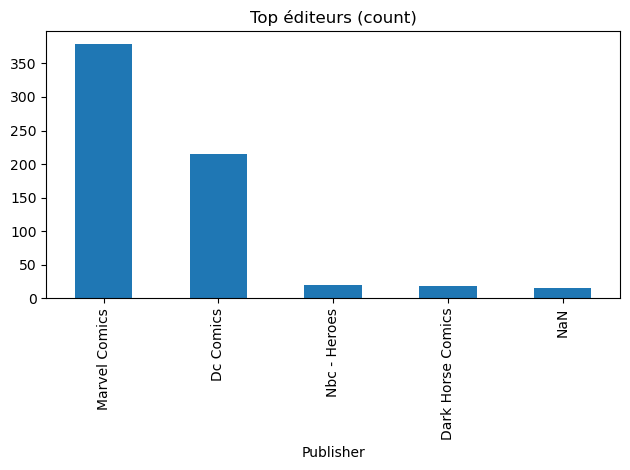

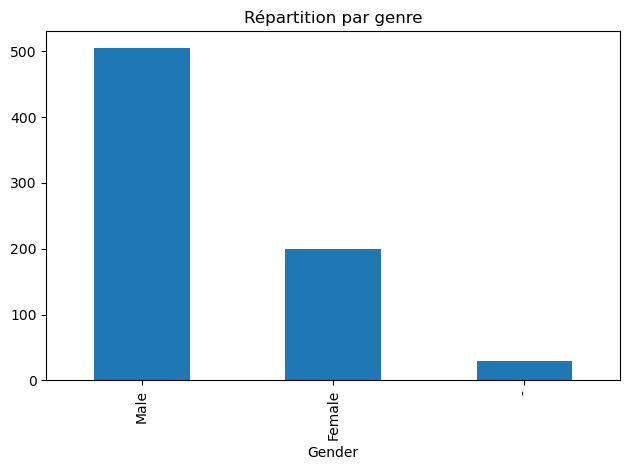

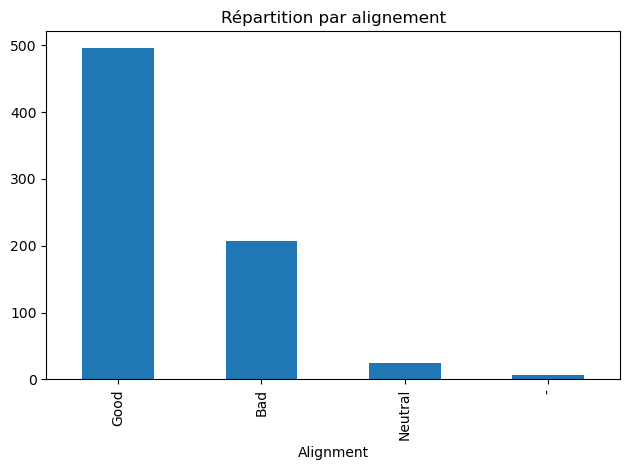

In [24]:
#Exportation de graphiques
plt.figure()
top_publishers.plot(kind="bar")
plt.title("Top éditeurs (count)")
plt.tight_layout()
plt.savefig(FIGS / "top_publishers.png", dpi=150)

plt.figure()
gender_counts.plot(kind="bar")
plt.title("Répartition par genre")
plt.tight_layout()
plt.savefig(FIGS / "gender_counts.png", dpi=150)

plt.figure()
alignment_counts.plot(kind="bar")
plt.title("Répartition par alignement")
plt.tight_layout()
plt.savefig(FIGS / "alignment_counts.png", dpi=150)

## 5. Summary table

In [25]:
table_publishers = df["Publisher"].value_counts().reset_index()
table_publishers.columns = ["Publisher","Count"]
table_publishers.head(10).to_csv(TABLES / "publishers_top10.csv", index=False)
table_publishers.head(10)

,Publisher,Count
0,Marvel Comics,379
1,Dc Comics,215
2,Nbc - Heroes,19
3,Dark Horse Comics,18
4,NaN,15
5,George Lucas,14
6,Image Comics,14
7,Marvel,9
8,Star Trek,6
9,Harpercollins,6
